In [ ]:
import numpy as np

A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
C = np.dot(A, B)
print(C)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)
plt.plot(x, y)
plt.show()


In [ ]:
def my_function(x):
    return x**2 + 2 * x + 1


result = my_function(3)
print(result)

Matplotlib is building the font cache; this may take a moment.


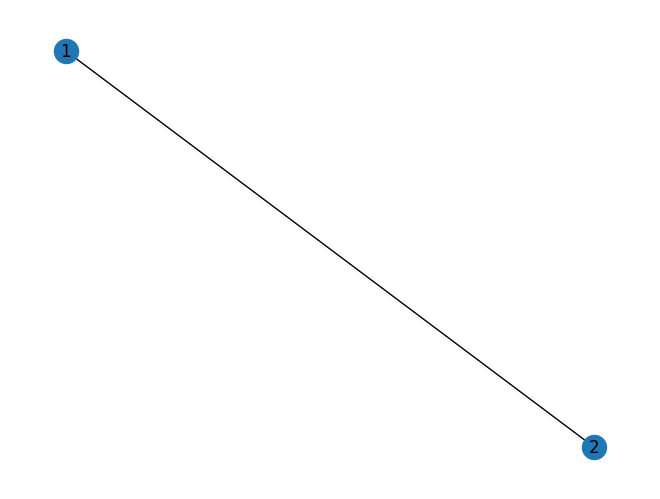

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# グラフの作成
G = nx.Graph()

# ノードとエッジの追加
G.add_node(1)
G.add_node(2)
G.add_edge(1, 2)

# ネットワークの可視化
nx.draw(G, with_labels=True)
plt.show()


In [2]:
import simpy

def car(env):
    while True:
        print(f'Car starts parking at {env.now}')
        parking_duration = 5
        yield env.timeout(parking_duration)
        
        print(f'Car starts driving at {env.now}')
        trip_duration = 2
        yield env.timeout(trip_duration)

# シミュレーション環境の作成
env = simpy.Environment()
env.process(car(env))

# シミュレーションの実行
env.run(until=15)


Car starts parking at 0
Car starts driving at 5
Car starts parking at 7
Car starts driving at 12
Car starts parking at 14


In [3]:
import networkx as nx
import simpy

# ネットワークの作成
G = nx.Graph()
G.add_edge('A', 'B', weight=1)
G.add_edge('B', 'C', weight=2)
G.add_edge('C', 'D', weight=1)

# パケット送信プロセス
def packet_transmission(env, source, destination, G):
    path = nx.shortest_path(G, source, destination, weight='weight')
    for i in range(len(path) - 1):
        print(f'Time {env.now}: Packet sent from {path[i]} to {path[i+1]}')
        yield env.timeout(G[path[i]][path[i+1]]['weight'])
    print(f'Time {env.now}: Packet arrived at {destination}')

# シミュレーション環境の作成
env = simpy.Environment()

# パケット送信プロセスの開始
env.process(packet_transmission(env, 'A', 'D', G))

# シミュレーションの実行
env.run()


Time 0: Packet sent from A to B
Time 1: Packet sent from B to C
Time 3: Packet sent from C to D
Time 4: Packet arrived at D
